In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Segmentação por cores com K-Means


## POC - Clusterizando apenas uma imagem

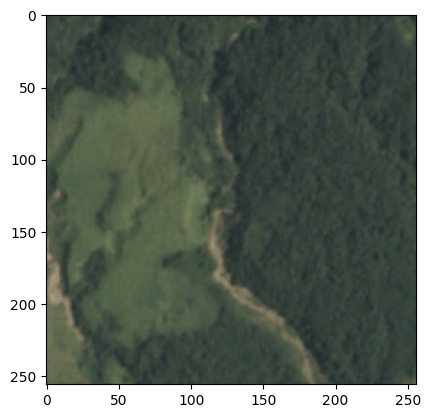

In [17]:
image = mpl.image.imread('../raw_images/train-jpg/train_1.jpg')
plt.imshow(image)

In [18]:
image.shape

(256, 256, 4)

Imagens de dimensões 256x256 pixels e 4 canais (RGBA)

In [19]:
# Fazendo o flatenning da imagem
X = image.reshape(-1, 4)
X.shape

(65536, 4)

In [33]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

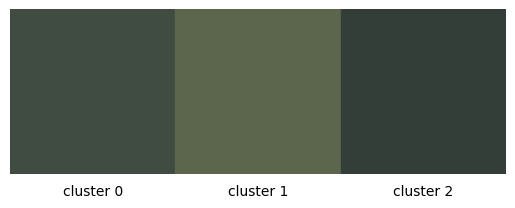

In [34]:
labels = set(kmeans.labels_)

# Plotting
fig, ax = plt.subplots()

# Plot de quadrados com a cor de cada cluster
for label, center in zip(labels, kmeans.cluster_centers_):
    color = [c / 255. for c in center[:3]]  # Normaliza os valores entre [0,1]
    square = plt.Rectangle((label * 100, 0), 100, 100, color=color)
    ax.add_patch(square)

    subtitle = f'cluster {label}' # Concatenate RGB values
    ax.text(label * 100 + 50, -10, subtitle, ha='center', va='center', color='black')

# Set plot limits and aspect
ax.set_xlim(0, len(labels) * 100)
ax.set_ylim(0, 100)
ax.set_aspect('equal', 'box')

# Remove axes
ax.axis('off')

plt.show()


In [35]:
# Cria um array em que cada pixel é o centroide daquele cluster
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape) / 255

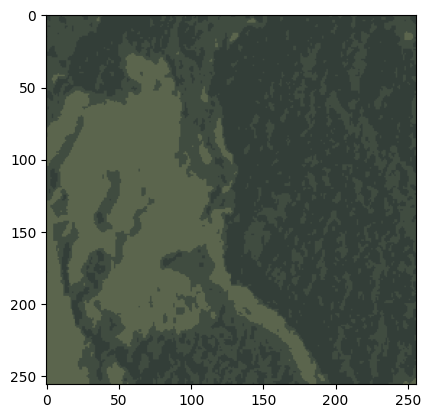

In [36]:
plt.imshow(segmented_img)

## Porcentagem de pixels por cluster

In [37]:
labels = kmeans.labels_

unique_values, value_counts = np.unique(labels, return_counts=True)
total_elements = len(labels)
percentages = (value_counts / total_elements) * 100

for value, percentage in zip(unique_values, percentages):
    print(f"Cluster {value}: {percentage:.2f}%")

Cluster 0: 28.93%
Cluster 1: 25.86%
Cluster 2: 45.21%


## Usando múltiplas imagens

In [ ]:
# read images
# flattenning
# stacking

# em progresso
combined_pixels = np.vstack((X,X2))
segmented_img = kmeans.cluster_centers_[kmeans.labels_[:X.shape[0]]]